# Sales prediction with python(TASK-5)

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
dg=pd.read_csv("C:\Desktop\Advertising.csv")

In [3]:
dg

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
dg.sample(8)

,Unnamed: 0,TV,Radio,Newspaper,Sales
68,69,237.4,27.5,11.0,18.9
56,57,7.3,28.1,41.4,5.5
62,63,239.3,15.5,27.3,15.7
137,138,273.7,28.9,59.7,20.8
197,198,177.0,9.3,6.4,12.8
0,1,230.1,37.8,69.2,22.1
28,29,248.8,27.1,22.9,18.9
14,15,204.1,32.9,46.0,19.0


In [5]:
dg.sample

<bound method NDFrame.sample of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [6]:
dg.shape

(200, 5)

In [7]:
dg.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
dg.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
dg.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
dg.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [11]:
dg

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [12]:
dg.shape

(200, 4)

In [13]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
dg.size

800

In [15]:
dg.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [16]:
dg.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
dg.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [18]:
dg.duplicated().sum()

0

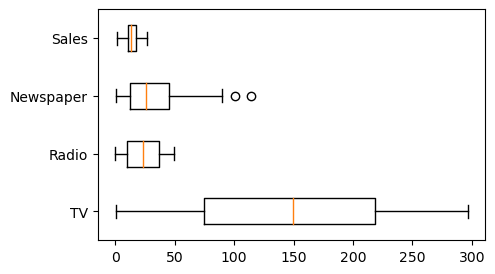

In [19]:
plt.figure(figsize=[5,3])
plt.boxplot(dg,vert=False,data=dg,labels=dg.columns)
plt.show()

## Analysing data by histplot graph

<Axes: xlabel='TV', ylabel='Count'>

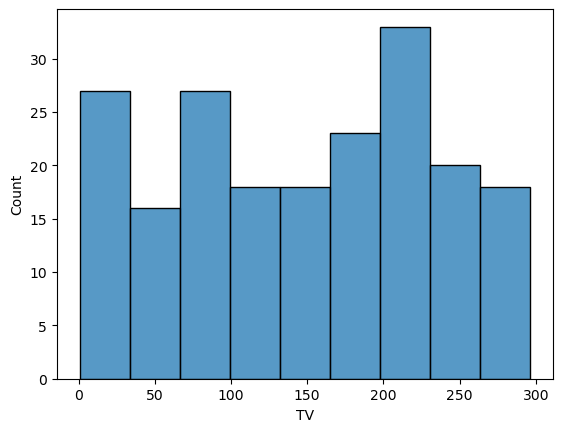

In [20]:
sns.histplot(dg['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

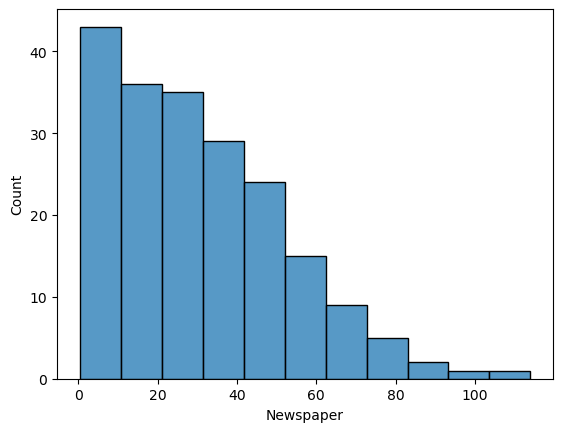

In [21]:
sns.histplot(dg['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

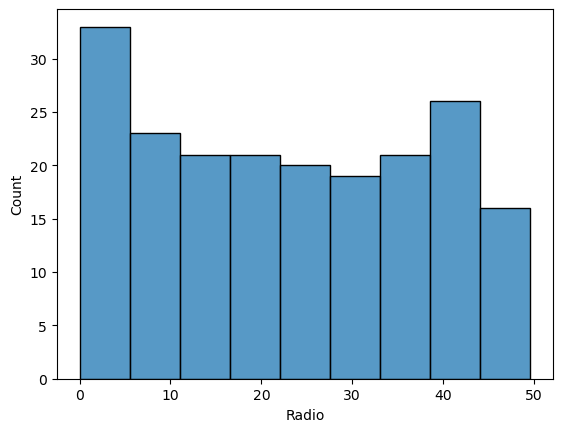

In [22]:
sns.histplot(dg['Radio'])

<Axes: xlabel='Sales', ylabel='Count'>

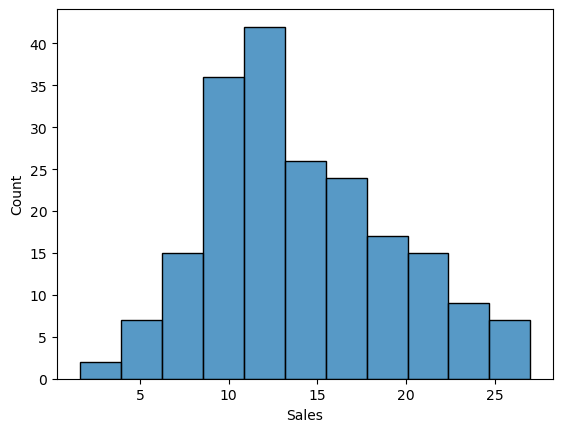

In [23]:
sns.histplot(dg['Sales'])

## Analysing data by distplot graph

C:\Users\arpit\AppData\Local\Temp\ipykernel_21124\3731947690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dg['Newspaper'])


<Axes: xlabel='Newspaper', ylabel='Density'>

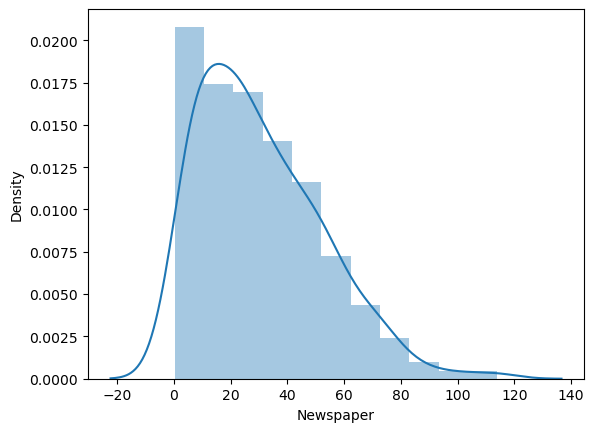

In [24]:
sns.distplot(dg['Newspaper'])

C:\Users\arpit\AppData\Local\Temp\ipykernel_21124\1104364246.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dg['TV'])


<Axes: xlabel='TV', ylabel='Density'>

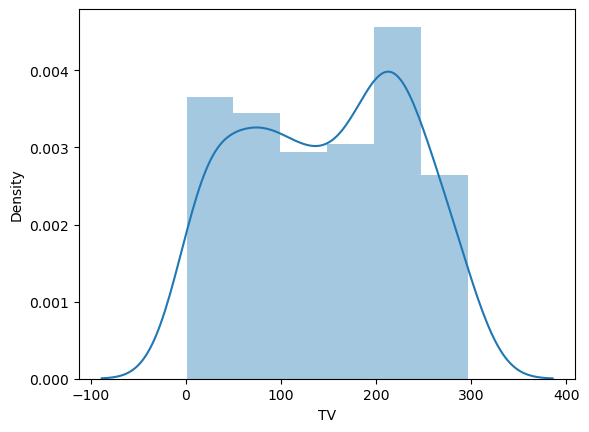

In [25]:
sns.distplot(dg['TV'])

## Analyse data by pairplot graph

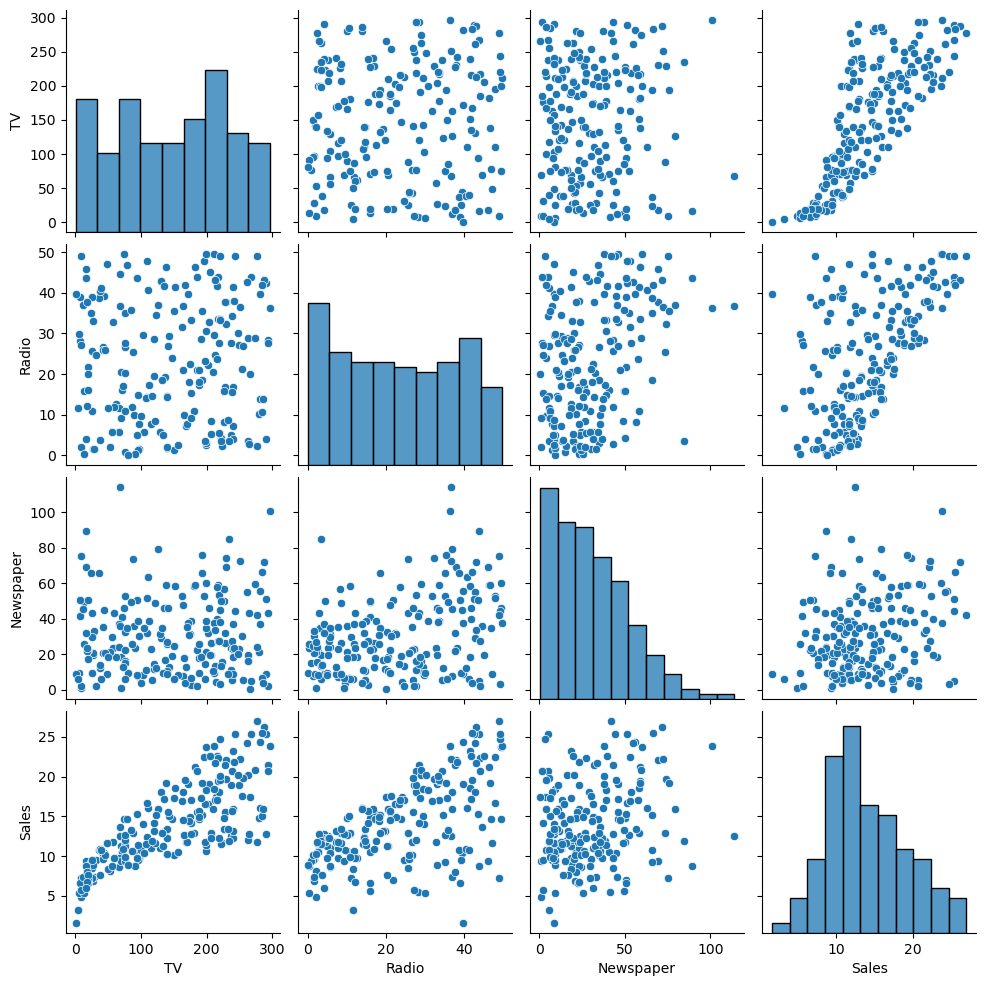

In [26]:
sns.pairplot(dg)

<Axes: >

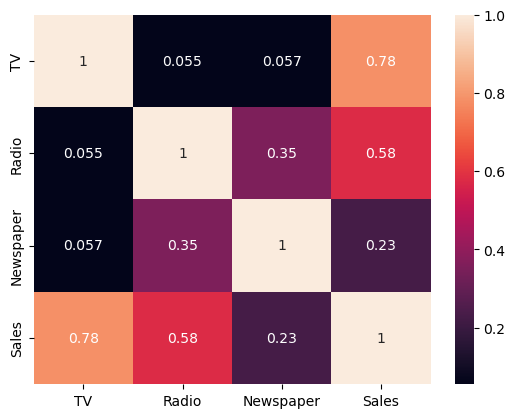

In [27]:
sns.heatmap(dg.corr(),annot=True)

## Train the model with the Advertising data set

In [28]:
x=dg.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y = dg.iloc[:,-1:]

In [30]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=50)

In [31]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 3)
(140, 3)
(60, 3)


In [32]:
xtrain,ytrain

(        TV  Radio  Newspaper
 114   78.2   46.8       34.5
 187  191.1   28.7       18.2
 76    27.5    1.6       20.7
 122  224.0    2.4       15.6
 142  220.5   33.2       37.9
 ..     ...    ...        ...
 132    8.4   27.2        2.1
 33   265.6   20.0        0.3
 109  255.4   26.9        5.5
 139  184.9   43.9        1.7
 176  248.4   30.2       20.3
 
 [140 rows x 3 columns],
      Sales
 114   14.6
 187   17.3
 76     6.9
 122   11.6
 142   20.1
 ..     ...
 132    5.7
 33    17.4
 109   19.8
 139   20.7
 176   20.2
 
 [140 rows x 1 columns])

In [33]:
xtest,ytest

(        TV  Radio  Newspaper
 112  175.7   15.4        2.4
 165  234.5    3.4       84.8
 12    23.8   35.1       65.9
 73   129.4    5.7       31.3
 144   96.2   14.8       38.9
 20   218.4   27.7       53.4
 199  232.1    8.6        8.7
 8      8.6    2.1        1.0
 39   228.0   37.7       32.0
 88    88.3   25.5       73.4
 81   239.8    4.1       36.9
 197  177.0    9.3        6.4
 69   216.8   43.9       27.2
 160  172.5   18.1       30.7
 25   262.9    3.5       19.5
 99   135.2   41.7       45.9
 151  121.0    8.4       48.7
 23   228.3   16.9       26.2
 138   43.0   25.9       20.5
 159  131.7   18.4       34.6
 89   109.8   47.8       51.4
 82    75.3   20.3       32.5
 24    62.3   12.6       18.3
 174  222.4    3.4       13.1
 137  273.7   28.9       59.7
 83    68.4   44.5       35.6
 107   90.4    0.3       23.2
 34    95.7    1.4        7.4
 97   184.9   21.0       22.0
 167  206.8    5.2       19.4
 123  123.1   34.6       12.4
 157  149.8    1.3       24.3
 75    16.

## Linear Regression

In [34]:
model = LinearRegression()

In [35]:
model.fit(xtrain,ytrain)

LinearRegression()

In [36]:
ypredict=model.predict(xtest)
ypredict

array([[13.86471261],
       [15.0090562 ],
       [10.60511722],
       [10.09061905],
       [10.2058302 ],
       [18.44112845],
       [15.35623109],
       [ 3.50456716],
       [20.57163267],
       [11.98288476],
       [15.08601123],
       [12.84835102],
       [21.13029782],
       [14.37916353],
       [15.96630443],
       [16.97004665],
       [10.28916068],
       [16.78706185],
       [ 9.5680503 ],
       [12.51794578],
       [16.90028224],
       [10.16656637],
       [ 8.06620555],
       [13.98212973],
       [21.32738303],
       [14.23529429],
       [ 7.20839801],
       [ 7.55987252],
       [15.4385442 ],
       [13.60561012],
       [14.89945663],
       [10.22068212],
       [11.980595  ],
       [16.40933006],
       [ 6.58023303],
       [ 9.63142726],
       [12.99984158],
       [20.51038927],
       [ 9.15336417],
       [11.31226434],
       [ 7.30108894],
       [24.61494601],
       [ 9.80946097],
       [18.27320104],
       [16.57103149],
       [12

In [37]:
model.score(xtrain,ytrain)*100

90.28165267955438

In [38]:
model.score(xtest,ytest)*100

85.9057555097746

In [39]:
mean_squared_error(ytest,ypredict)

2.622772900751398

In [40]:
mean_absolute_error(ytest,ypredict)

1.2349919247199037

In [41]:
r2_score(ytest,ypredict)*100

85.9057555097746

In [42]:
r = np.sqrt(mean_squared_error(ytest,ypredict))
r

1.6194977310115004

In [43]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [44]:
score=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(score)
finalscore

0.8910650514774895